In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-12-26 06:59:29.731828: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-26 06:59:34.200302: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-26 06:59:34.308761: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-26 06:59:34.309214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-26 06:59:34.309267: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [2]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [53]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE, target_size=IMG_SIZE)

Found 8227 images belonging to 2 classes.


In [142]:
validation_generator = ImageDataGenerator()
validation_data_generator = test_generator.flow_from_directory(validation_dir,
shuffle=False,
batch_size=BATCH_SIZE, target_size=IMG_SIZE)

Found 8226 images belonging to 2 classes.


# Load models

## Custom CNN model

Training with Data Augmentation

In [7]:
model_A = get_model_A(0.0, True, 0.0)

lr = 0.001
model_A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_A.load_weights('.model_a')

test_accuracy(model_A, test_dataset)
# print_tsne(model_A, test_dataset, 2500)


2022-12-26 06:59:38.186426: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .model_a: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?
2022-12-26 06:59:38.268961: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-26 06:59:38.288978: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100035000 Hz
2022-12-26 06:59:38.553979: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-12-26 06:59:38.998785: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8302


 16/258 [>.............................] - ETA: 2s - loss: 0.5384 - accuracy: 0.8379

2022-12-26 06:59:39.538129: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-12-26 06:59:39.538819: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


258/258 [==============================] - 4s 11ms/step - loss: 0.1574 - accuracy: 0.9392
Test accuracy : 0.9392244815826416


0.9392244815826416

2022-12-26 06:59:42.535875: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .model_b: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 3s 11ms/step - loss: 0.1408 - accuracy: 0.9435
Test accuracy : 0.9434787631034851


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.001s...
[t-SNE] Computed neighbors for 8227 samples in 1.870s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 2.244414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.000961
[t-SNE] KL divergence after 2500 iterations: 1.763818


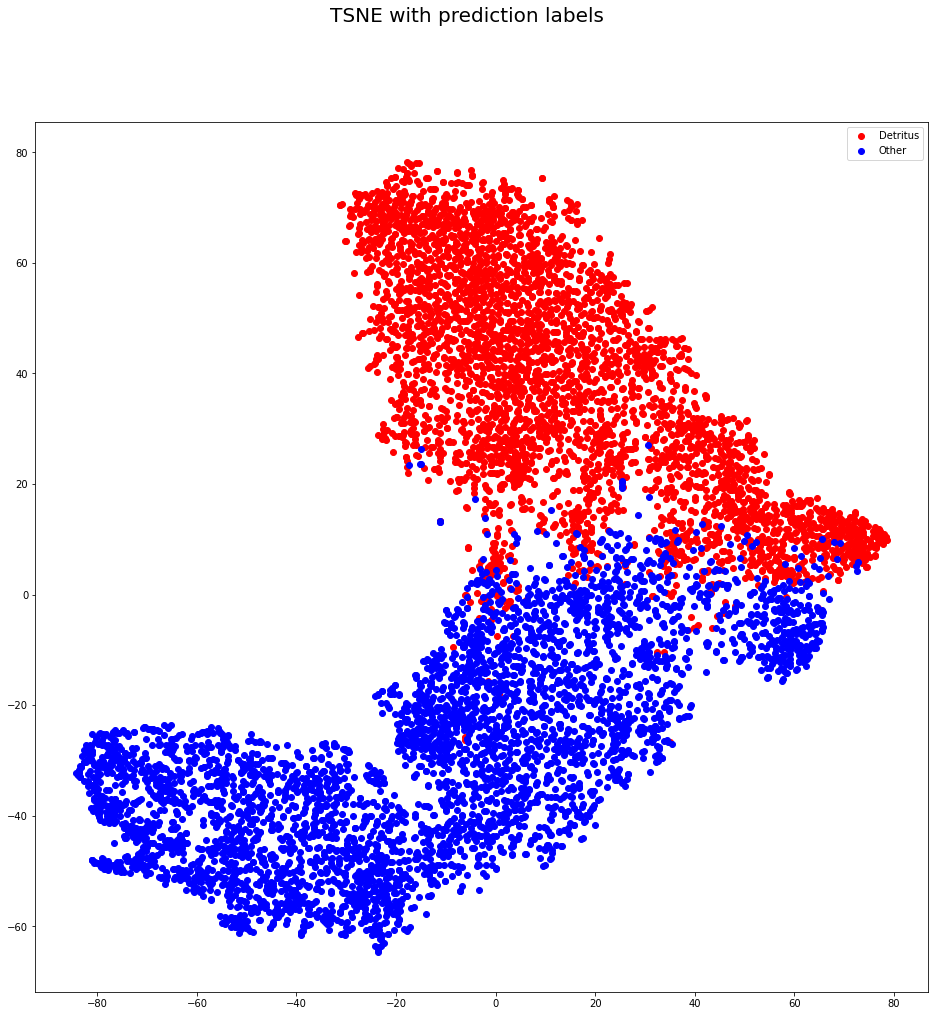

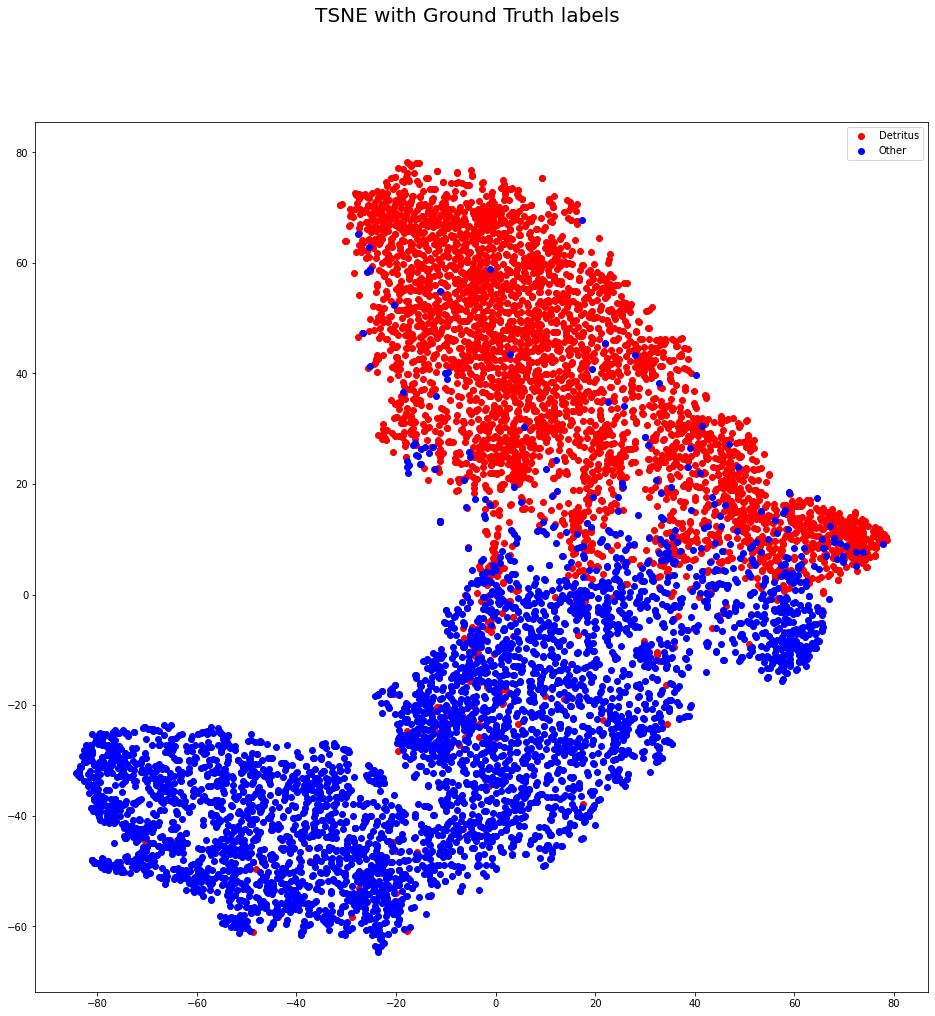

In [8]:
model_B = get_model_B(0.0, True, 0.0)

lr = 0.001
model_B.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_B.load_weights('.model_b')

test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)


In [9]:
def get_mobile_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    if data_aug:
        dag = data_augmentation(inputs)
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(dag)
    else:
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
    
    x = base_model(processed_input)
    
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    
    x = global_average_layer(x)
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

## MobileNetV2 Model From Scratch

2022-12-26 07:00:51.954069: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .mobile_net_scratch: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 7s 24ms/step - loss: 0.1297 - accuracy: 0.9542
Test accuracy : 0.9541752934455872


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.012s...
[t-SNE] Computed neighbors for 8227 samples in 2.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 0.757673
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.934135
[t-SNE] KL divergence after 2500 iterations: 1.338678


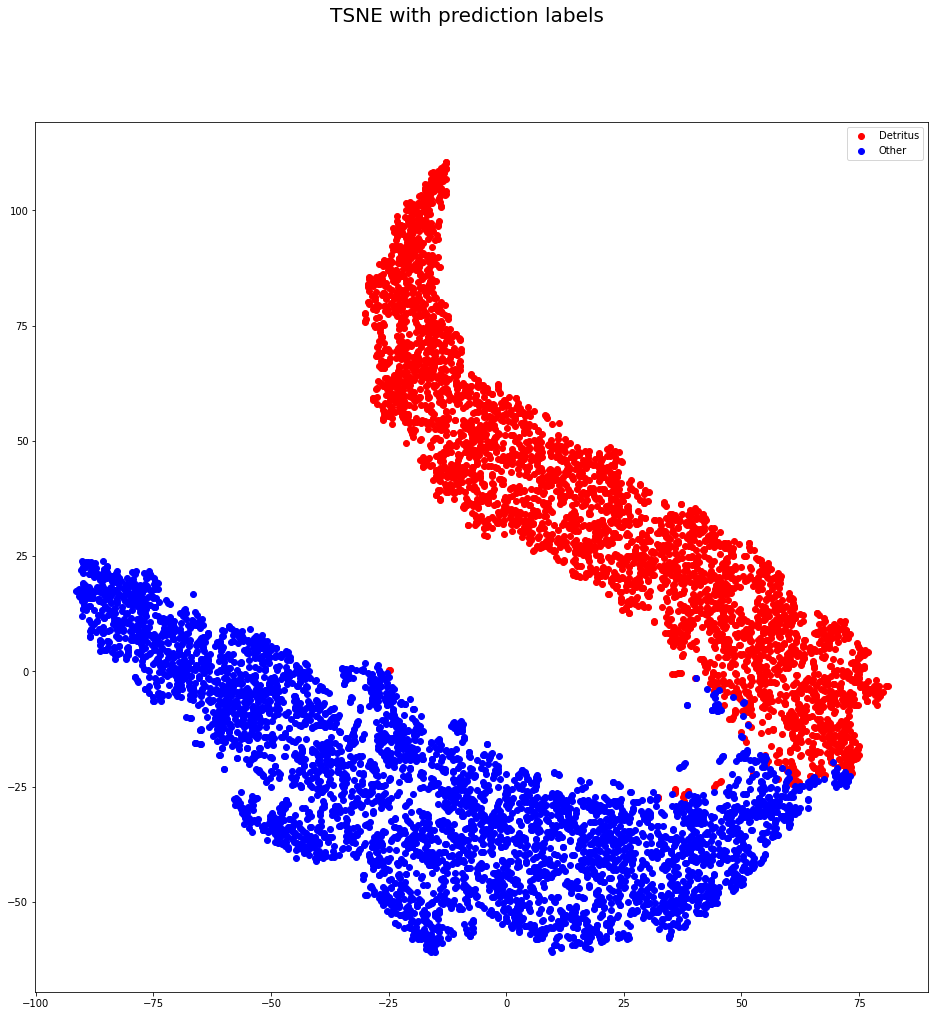

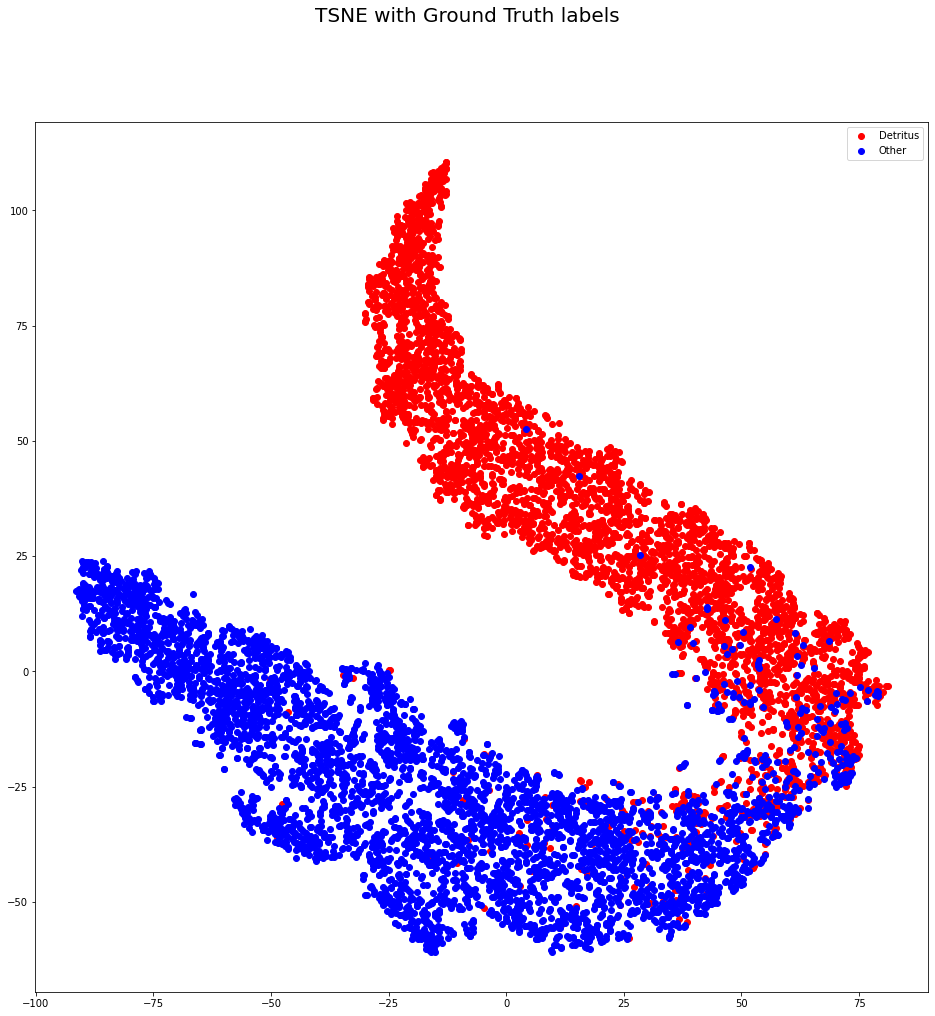

In [10]:
lr = 0.0001
mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
mobileNetModelSc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

mobileNetModelSc.load_weights('.mobile_net_scratch')

test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

## DenseNet model

In [11]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

2022-12-26 07:02:14.385520: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .dense_net_ft_lr: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 21s 63ms/step - loss: 0.1566 - accuracy: 0.9436
Test accuracy : 0.9436003565788269


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.018s...
[t-SNE] Computed neighbors for 8227 samples in 2.425s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 7.215098
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.784164
[t-SNE] KL divergence after 2500 iterations: 2.181146


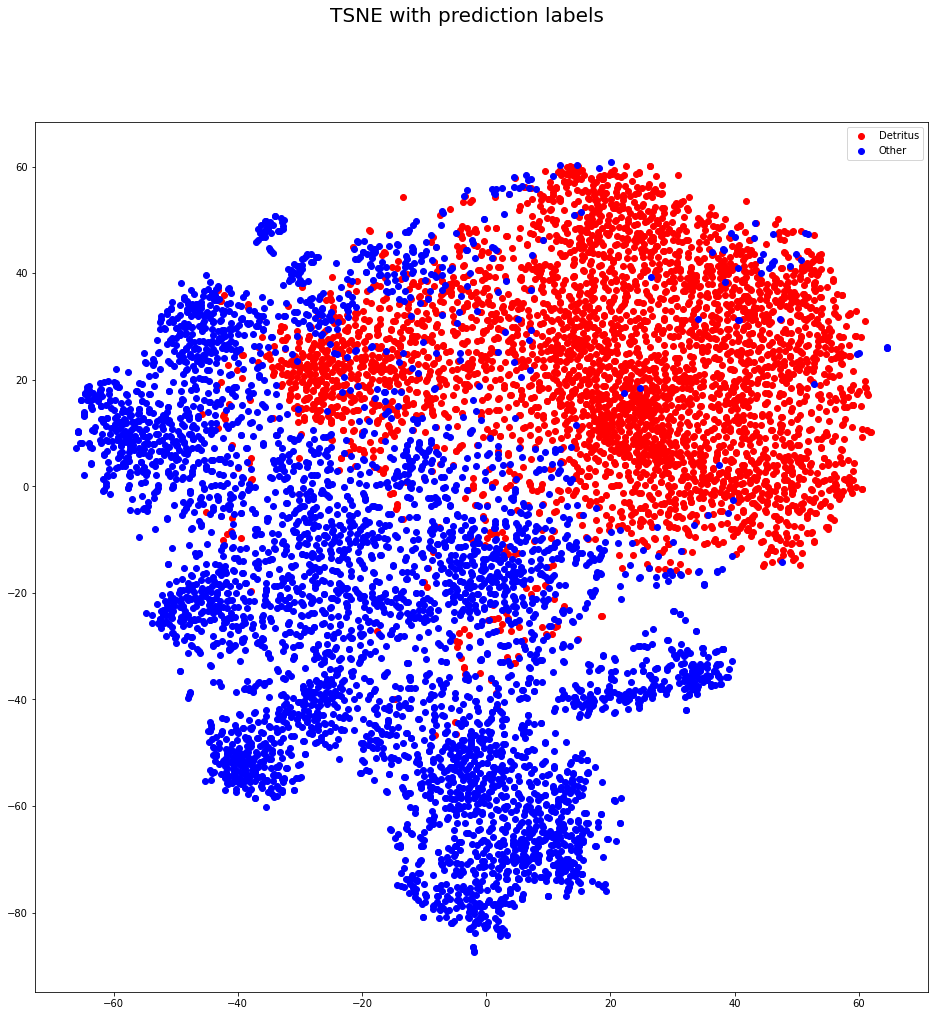

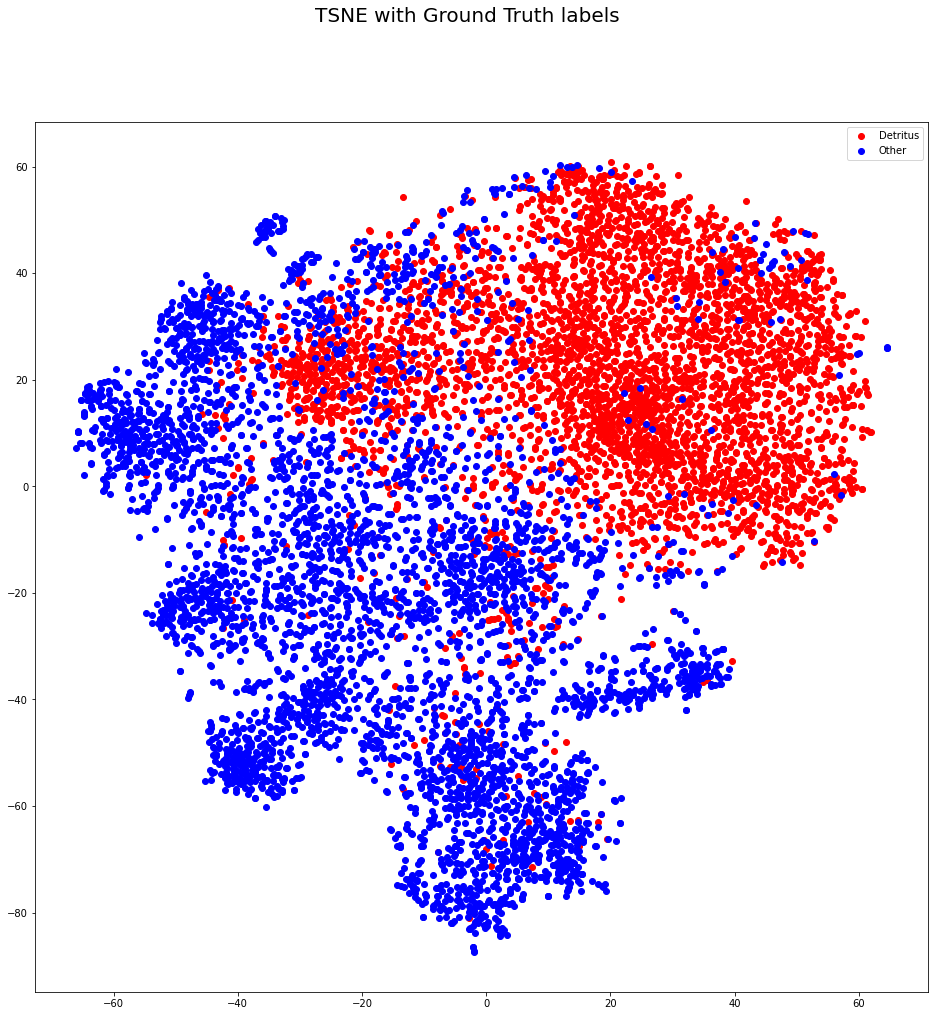

In [12]:
_, dense_model = get_dense_net(0.0, True, 0.0)

dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

dense_model.load_weights('.dense_net_ft_lr')

loss, accuracy = dense_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)
    
print_tsne(dense_model, test_dataset, 2500)

## Inception Resnet

In [13]:
base_learning_rate = 0.0001
inception_resnet_base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
inception_resnet_base_model.trainable = False
ir_preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input
ir_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
ir_prediction_layer = tf.keras.layers.Dense(1)

ir_inputs = tf.keras.Input(shape=(160, 160, 3))
dag = data_augmentation(ir_inputs)
ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(dag)

ir_x = inception_resnet_base_model(ir_x, training=False)
ir_x = ir_global_average_layer(ir_x)
ir_outputs = ir_prediction_layer(ir_x)
ir_model = tf.keras.Model(ir_inputs, ir_outputs)
    
ir_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=['accuracy'])

2022-12-26 07:04:30.336020: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .inception_resnet_v2_lr: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 23s 71ms/step - loss: 0.1680 - accuracy: 0.9347
Test accuracy : 0.934727132320404


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.014s...
[t-SNE] Computed neighbors for 8227 samples in 3.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 6.671487
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.319763
[t-SNE] KL divergence after 2500 iterations: 2.069622


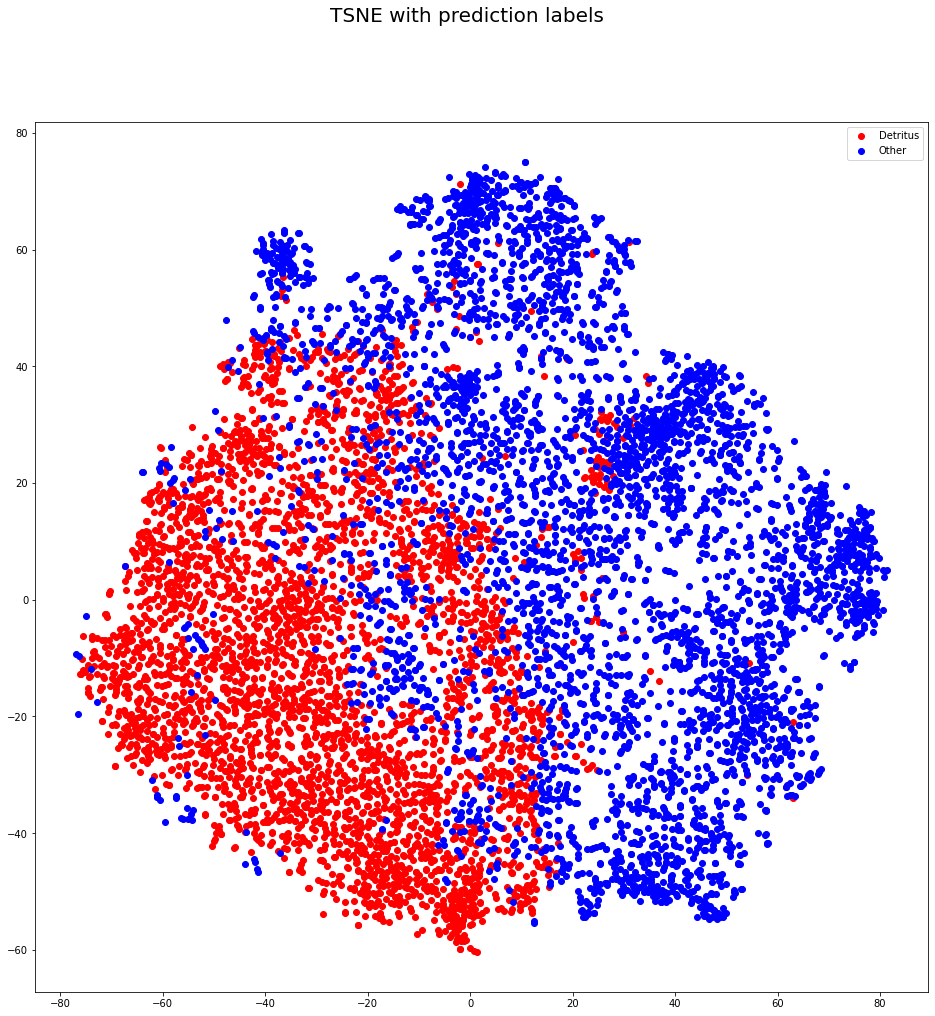

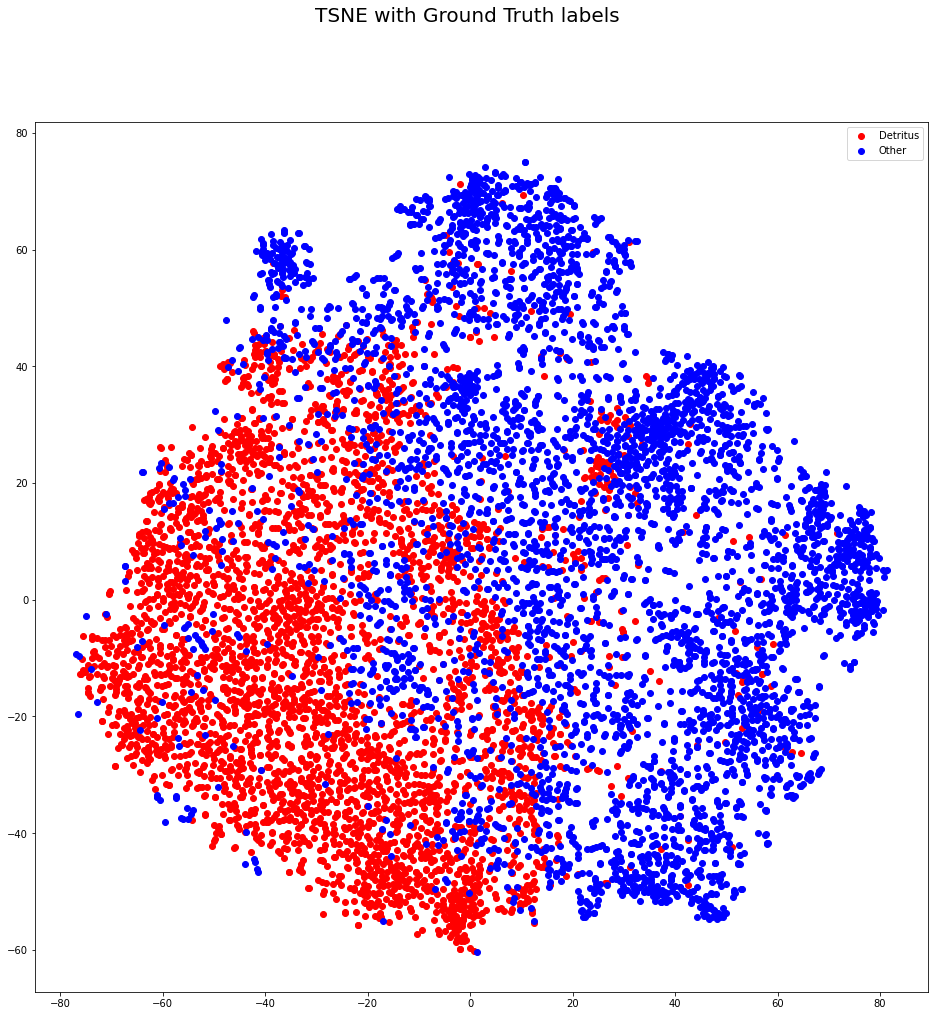

In [14]:
ir_model.load_weights('.inception_resnet_v2_lr')

loss, accuracy = ir_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)
    
print_tsne(ir_model, test_dataset, 2500)

# Analyze models

In [15]:
def show_confusion_matrix(model, generator):
    test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
    predictions = model.predict(generator, steps=test_steps_per_epoch)
    
    y_pred = np.empty(len(predictions), dtype=float) 
    for i in range(len(predictions)):
        score = tf.nn.sigmoid(predictions[i])
        y_pred[i] = tf.where(score < 0.5, 0, 1)
    
    detr_list = ['LClass_Detritus', 'LClass_Bubbles', 'LClass_shadow']
    
    true_classes = generator.classes
    filepaths = generator.filepaths
    label_map = generator.class_indices
    index_map = {v: k for k, v in label_map.items()}
    
    class_labels = list(generator.class_indices.keys()) 
    correct =  {new_key: 0 for new_key in class_labels}
    incorrect = {new_key: 0 for new_key in class_labels}
    correct_files = []
    incorrect_files = []
    
    
    for i in range(len(true_classes)):
        if any(index_map[true_classes[i]] in s for s in detr_list):
            if (y_pred[i] == 0):
                correct[index_map[true_classes[i]]] += 1
                correct_files.append(filepaths[i])
            else:
                incorrect[index_map[true_classes[i]]] += 1
                incorrect_files.append(filepaths[i])
        else:
            if (y_pred[i] == 1):
                correct[index_map[true_classes[i]]] += 1
                correct_files.append(filepaths[i])
            else:
                incorrect[index_map[true_classes[i]]] += 1
                incorrect_files.append(filepaths[i])
    # report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
    for class_name in class_labels:
        corr = correct[class_name]
        incorr = incorrect[class_name]
        total = corr + incorr
        if (total == 0):
            corr_perc = 0
        else:
            corr_perc = corr/total
        print(class_name, corr, incorr, total, corr_perc)
    return correct, incorrect, correct_files, incorrect_files

## Test generator

In [144]:
from sklearn import metrics

def show_report(model, generator):
    test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
    predictions = model.predict(generator, steps=test_steps_per_epoch)
    
    y_pred = np.empty(len(predictions), dtype=float) 
    for i in range(len(predictions)):
        score = tf.nn.sigmoid(predictions[i])
        y_pred[i] = tf.where(score < 0.5, 0, 1)
    
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())   
    report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
    print(report)

In [148]:
validation_generator.batch_size

AttributeError: 'ImageDataGenerator' object has no attribute 'batch_size'

In [145]:
show_report(model_B, validation_generator)
test_accuracy(model_B, test_dataset)

AttributeError: 'ImageDataGenerator' object has no attribute 'samples'

In [55]:
show_report(model_B, test_data_generator)
test_accuracy(model_B, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.95      0.94      0.94      3804
       Other       0.95      0.96      0.95      4423

    accuracy                           0.95      8227
   macro avg       0.95      0.95      0.95      8227
weighted avg       0.95      0.95      0.95      8227

258/258 [==============================] - 3s 11ms/step - loss: 0.1408 - accuracy: 0.9435
Test accuracy : 0.9434787631034851


0.9434787631034851

In [28]:
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
predictions_A = model_A.predict(test_data_generator, steps=1)
predictions_B = model_B.predict(test_data_generator, steps=test_steps_per_epoch)


In [49]:
predictions_A = model_A.predict(test_data_generator, steps=1)

In [47]:
predictions_A

array([[ 1.3713485e+00],
       [ 1.5222507e+00],
       [ 1.3029134e-01],
       [-1.2712117e+00],
       [-1.2545987e+00],
       [-7.4359655e-01],
       [-1.7490100e+00],
       [-1.3411368e+00],
       [-5.5148015e+00],
       [ 7.5534964e-01],
       [ 1.8112571e+00],
       [ 4.6231465e+00],
       [-4.5817003e+00],
       [-4.6341891e+00],
       [-3.4969664e+00],
       [-3.8428593e+00],
       [-2.3574191e-01],
       [-6.6715753e-01],
       [-4.0893722e-01],
       [-1.3860310e+00],
       [-2.3664427e+00],
       [ 1.1782007e-01],
       [-9.5171094e-01],
       [-2.9531083e+00],
       [ 3.4204572e-01],
       [ 5.2334964e-01],
       [ 2.5952196e-01],
       [ 2.8586280e-01],
       [ 2.1887082e-01],
       [-1.4261651e+00],
       [-1.9630352e+00],
       [-1.0159521e+00],
       [-1.8839544e+00],
       [-1.5229347e+00],
       [-1.2704562e+00],
       [-6.1493170e-01],
       [ 1.6912452e+00],
       [ 3.7068977e+00],
       [ 3.1484399e+00],
       [ 7.5323367e-01],


In [40]:
len(predictions_B)

8227

In [149]:
show_report(model_A, validation_data_generator)
test_accuracy(model_A, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.94      0.92      0.93      3816
       Other       0.93      0.95      0.94      4410

    accuracy                           0.94      8226
   macro avg       0.94      0.94      0.94      8226
weighted avg       0.94      0.94      0.94      8226

258/258 [==============================] - 3s 11ms/step - loss: 0.1574 - accuracy: 0.9392
Test accuracy : 0.9392244815826416


0.9392244815826416

In [150]:
show_report(mobileNetModelSc, validation_data_generator)
test_accuracy(mobileNetModelSc, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.97      0.92      0.94      3816
       Other       0.93      0.97      0.95      4410

    accuracy                           0.95      8226
   macro avg       0.95      0.95      0.95      8226
weighted avg       0.95      0.95      0.95      8226

258/258 [==============================] - 6s 23ms/step - loss: 0.1297 - accuracy: 0.9542
Test accuracy : 0.9541752934455872


0.9541752934455872

In [151]:
show_report(dense_model, validation_data_generator)
test_accuracy(dense_model, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.92      0.94      0.93      3816
       Other       0.95      0.93      0.94      4410

    accuracy                           0.93      8226
   macro avg       0.93      0.93      0.93      8226
weighted avg       0.93      0.93      0.93      8226

258/258 [==============================] - 15s 59ms/step - loss: 0.1566 - accuracy: 0.9436
Test accuracy : 0.9436003565788269


0.9436003565788269

In [152]:
show_report(ir_model, validation_data_generator)
test_accuracy(ir_model, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.93      0.93      0.93      3816
       Other       0.94      0.94      0.94      4410

    accuracy                           0.94      8226
   macro avg       0.94      0.94      0.94      8226
weighted avg       0.94      0.94      0.94      8226

258/258 [==============================] - 18s 69ms/step - loss: 0.1680 - accuracy: 0.9347
Test accuracy : 0.934727132320404


0.934727132320404

# Analyzing images

In [153]:
correct, incorrect, mobile_correct_files, mobile_incorrect_files = show_confusion_matrix(mobileNetModelSc, validation_data_generator)

Detritus 3518 298 3816 0.9219077568134172
Other 4286 124 4410 0.9718820861678005


In [154]:
correct, incorrect, dense_correct_files, dense_incorrect_files = show_confusion_matrix(dense_model, validation_data_generator)

Detritus 3586 230 3816 0.939727463312369
Other 4090 320 4410 0.927437641723356


In [155]:
correct, incorrect, modelB_correct_files, modelB_incorrect_files = show_confusion_matrix(model_B, validation_data_generator)

Detritus 3543 273 3816 0.9284591194968553
Other 4209 201 4410 0.954421768707483


In [156]:
correct, incorrect, ir_correct_files, ir_incorrect_files = show_confusion_matrix(ir_model, validation_data_generator)

Detritus 3540 276 3816 0.9276729559748428
Other 4161 249 4410 0.9435374149659864


In [79]:
incorrect_files

['../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_103_2017-09-19_00_19_43.344_1250_603.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_103_2017-09-19_06_19_05.639_1833_155.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_115_2017-09-21_23_41_42.650_137_1888.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_124_2017-09-21_18_18_59.744_946_46.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_126_2017-09-19_05_57_56.992_0_1650.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_162_2017-09-21_02_55_19.170_1421_1298.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_169_2017-09-19_05_36_48.737_1738_740.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_169_2017-09-21_19_36_53.362_93_26.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_173_2017-09-21_03_28_42.304_1858_435.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_175_2017-

In [73]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
        final_dir = "Output-Mobile-train-normal/" + tenancy + "/" + class_name+"/" + result
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

In [74]:
process_results(mobile_correct_files, mobile_incorrect_files, "mobile-net-test")

In [157]:
incorrect_files = set()
for file in mobile_incorrect_files:
    incorrect_files.add(''.join(file))
for file in dense_incorrect_files:
    incorrect_files.add(''.join(file))
for file in modelB_incorrect_files:
    incorrect_files.add(''.join(file))
for file in ir_incorrect_files:
    incorrect_files.add(''.join(file))

In [159]:
len(incorrect_files)

1042

In [162]:
all_wrong = []
for file in incorrect_files:
    row = file + ";" + get_class_name(file)
    c = 0
    if file in modelB_incorrect_files:
        row = row + ";N"
        c = c + 1
    else:
        row = row + ";Y"

    if file in mobile_incorrect_files:
        row = row + ";N"
        c = c + 1
    else:
        row = row + ";Y"
        
    if file in dense_incorrect_files:
        row = row + ";N"
        c = c + 1
    else:
        row = row + ";Y"
        
    if file in ir_incorrect_files:
        row = row + ";N"
        c = c + 1
    else:
        row = row + ";Y"
    if (c == 4):
        all_wrong.append(file)
    print(row)  

../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_631_2017-09-28_00_06_04.294_1832_1116.png;Detritus;Y;Y;N;N
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_949_2017-09-20_15_36_29.632_1027_1019.png;Detritus;Y;Y;N;Y
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_935_2017-09-20_15_36_29.632_0_1293.png;Detritus;N;Y;Y;N
../../Detritus/Dataset-Detritus-Bubble/val/Other/frame_930_2017-09-21_06_15_38.060_1930_1441.png;Other;Y;Y;Y;N
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_637_2017-09-30_12_00_31.607_260_656.png;Detritus;Y;N;Y;Y
../../Detritus/Dataset-Detritus-Bubble/val/Other/frame_26_2017-09-27_05_55_28.248_1530_754.png;Other;Y;Y;N;Y
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_787_2017-09-29_18_01_05.556_220_307.png;Detritus;Y;Y;Y;N
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_631_2017-09-29_12_04_58.884_126_1452.png;Detritus;N;N;Y;N
../../Detritus/Dataset-Detritus-Bubble/val/Other/frame_11_2017-09-16_11_01_32.735_454_

In [163]:
len(all_wrong)

139

In [164]:
process_results([], all_wrong, "all-wrong-validation")

['/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/numpy']
